## Notebook to convert depth to SWE estimate using Sturm's snow climate classes
TODO: handling to select climate classes
- manage array handling

In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [6]:
import sys, os
# sys.path.insert(1, '/mnt/Backups/jmhu/git_dirs/wv_stereo_processing/notebooks/')
# sys.path.insert(1, '/mnt/Backups/jmhu/git_dirs/wv_stereo_processing/scripts/')
sys.path.insert(1, 'scripts')

from density_models import *
from calc_swe import *
from helpers import fn_list, load

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

In [6]:
# Load the file
dep_fn='/mnt/Backups/jmhu/data/stereo_test/3DEP_GM_test/frompfe/USGS_LPC_CO_MesaCo_QL2_2016_95th_perc_DSM_fromLAZ_reprojtest__warped2__USGS_one_meter_CO_MesaCo_QL2_allGM_2016-adj_clip.tif'
dep=load(dep_fn, '3DEP DSM')

In [9]:
def add_scalebar(ax, scale, location='upper left', frameon=True, color='k', box_color='w', box_alpha=1):
    ax.add_artist(ScaleBar(scale, location=location, frameon=frameon, color=color, box_color=box_color, box_alpha=box_alpha))

def prep_axis(ax, turnoffticks=None, turnoffaxis=None, turnofflabels=None, fc='k'):
    if turnoffticks:
        ax.set_xticks([])
        ax.set_yticks([])
    if turnoffaxis:
        ax.axis('off')
    if turnofflabels:
        ax.set_xlabel('')
        ax.set_ylabel('')
    if fc:
        ax.set_facecolor(fc)

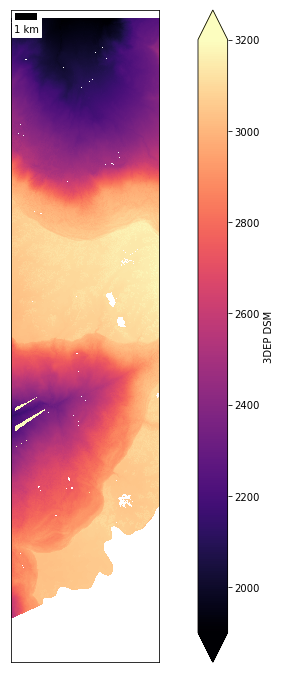

In [11]:
# vmin=2900
vmin=1900
vmax=3200
# vmin=None; vmax=None;


fig, ax = plt.subplots(figsize=(14,12))
dep.plot.imshow(ax=ax, cmap='magma', vmin=vmin, vmax=vmax, interpolation="None")
add_scalebar(ax=ax, scale=1)
prep_axis(ax=ax, turnoffticks=True, turnofflabels=True, fc='w')
ax.set_aspect('equal')
plt.title('');

In [12]:
# load hillshade
hs_fn=f'{dep_fn[:-4]}_hs.tif'
hs=load(hs_fn, '3DEP hillshade')

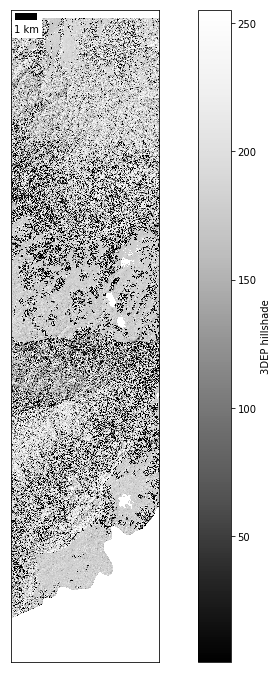

In [15]:
fig, ax = plt.subplots(figsize=(14,12))
hs.plot.imshow(ax=ax, cmap='Greys_r',)
add_scalebar(ax=ax, scale=1)
prep_axis(ax=ax, turnoffticks=True, turnofflabels=True, fc='w')
ax.set_aspect('equal')
plt.title('');

In [ ]:
# vmin=2900
vmin=1900
vmax=3200
# vmin=None; vmax=None;


fig, ax = plt.subplots(figsize=(14,12))
dep.plot.imshow(ax=ax, cmap='magma', vmin=vmin, vmax=vmax, interpolation="None")
add_scalebar(ax=ax, scale=1)
prep_axis(ax=ax, turnoffticks=True, turnofflabels=True, fc='w')
ax.set_aspect('equal')
plt.title('');

In [4]:
swe_fns=['/mnt/Backups/jmhu/data/stereo_test/ASO_3M_SD_USCOGM_20170208_12N-32612__sturmSWE.tif',
         '/mnt/Backups/jmhu/data/stereo_test/ASO_3M_SD_USCOGM_20170208_12N-32612__bulkSWE.tif',
         '/mnt/Backups/jmhu/data/stereo_test/ASO_3M_SD_USCOGM_20170208_12N-32612__hillSWE.tif'
        ]

sd_names=['Bulk density', 'Hill model', 'Sturm snow climate class']

### Load files

In [5]:
# Load swe_fns if they exist
swe_list=[]
override=True
if override:
    wv_sd_fn='/mnt/Backups/jmhu/data/stereo_test/DEM_stacks/pc_align_outputs/PC_align_attempt13_clipref_bounded_resa3m.tif'
    wv_sd=load(wv_sd_fn, 'WV-3DEP SD')
    sd_fn='/mnt/Backups/jmhu/data/stereo_test/ASO_SD_3M_clipref_bounded_pcalign_attempt13.tif'
    sd=load(sd_fn, "ASO SD")
    calculate_swe=True
elif os.path.exists(swe_fns[0]):
    calculate_swe=False
    print('2')
    for nom, swe_fn in zip(sd_names, swe_fns):
        swe=load(swe_fn, nom)
        swe_list.append(swe)
else:
    print('3')
    # Specify snow depth files and load
    sd_fn=fn_list('/mnt/Backups/jmhu/data/stereo_test/', "*/*ASO*_SD_*.tif")[1]
    sd=load(sd_fn, "ASO SD")
    calculate_swe=True
    sd

In [6]:
# x=np.ravel(np.ma.fix_invalid(sd.values))
# y=np.ravel(np.ma.fix_invalid(wv_sd.values))
# x.shape
# plt.scatter(x, y, alpha=0.2, marker='.')
# plt.xlim(0, 5)
# plt.ylim(0, 5)
# plt.scatter(x, y, alpha=0.2, marker='.')
# # plt.xlim(0, 5)
# # plt.ylim(0, 5)

In [7]:
# sturm_swe_params=sturm_swecalc(h=sd, snow_class='Alpine', YMD='20170208', return_all=True)

In [8]:
# np.nanmedian(sturm_swe_params[1])

In [9]:
# plt.imshow(sturm_swe_params[0], vmin=0, vmax=400)
# plt.colorbar()

In [10]:
sd_fn=fn_list('/mnt/Backups/jmhu/data/stereo_test/', "*/*ASO*_SD_*.tif")[1]
sd=load(sd_fn, "ASO SD")
sd

<xarray.DataArray 'ASO SD' (y: 19063, x: 24869)>
[474077747 values with dtype=float64]
Coordinates:
  * y            (y) float64 4.353e+06 4.353e+06 ... 4.295e+06 4.295e+06
  * x            (x) float64 7.266e+05 7.266e+05 ... 8.012e+05 8.012e+05
    spatial_ref  int64 0
Attributes:
    transform:     (3.000163384892096, 0.0, 726621.8109601407, 0.0, -3.000163...
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     SUPER snow depth [m]
    grid_mapping:  spatial_ref

In [11]:
calculate_swe=True

In [12]:
override=False

### Calculate SWE

In [28]:
def swe_models(sd, YMD="20170201"):
    '''Hardcoded for now, all inputs are meteres, indidivual models handle appropriate conversions and outputs SWE in mm'''
    ######## STURM SWE ########
    sturm_swe = sturm_swecalc(h=sd, snow_class="Alpine", YMD=YMD)
    sturm_swe.name='Sturm SWE [mm]'


    ######## BULK SWE ########
    bulk_swe = bulkdensity_swecalc(h=sd, bulk_density=0.3)
    bulk_swe.name='Bulk SWE [mm]'
    bulk_swe=bulk_swe*1000


    ######## HILL SWE ########
    # Convert snow depth from meters to millimeters
    sd_converted=get_snowdepth(arr=sd, mm_convert=True)
    pptwt_fn="/mnt/Backups/jmhu/git_dirs/snowdensity/ppt_wt_final.txt"
    td_fn="/mnt/Backups/jmhu/git_dirs/snowdensity/td_final.txt"
    hill_swe_paper, _, _, _ = calc_swe(h=sd_converted, td_fn=td_fn, pptwt_fn=pptwt_fn, YMD="20170201")

    pptwt_fn="/mnt/Backups/jmhu/git_dirs/pangeo_sprints/contributors/michelle/PPTWT.tif"
    td_fn="/mnt/Backups/jmhu/git_dirs/pangeo_sprints/contributors/michelle/TD.tif"
    hill_swe, _, _, _ = calc_swe(h=sd_converted, td_fn=td_fn, pptwt_fn=pptwt_fn, YMD=YMD)
    
    swe_list=[bulk_swe, hill_swe, sturm_swe]
    return swe_list

In [29]:
if calculate_swe:
    # Trim the sd!
    minx, miny, maxx, maxy = [740000, 4317500, 775000, 4335000]
    sd=sd.rio.clip_box(minx, miny, maxx, maxy)
#     for idx, swe in enumerate(swe_list):
#         a=swe.rio.clip_box(minx, miny, maxx, maxy)
#         swe_list[idx]=a

In [30]:
%%time
if calculate_swe:
    aso_swe_list=swe_models(sd, YMD="20170208")
    if override:
        wv_swe_list=swe_models(wv_sd, YMD="20170201")
#     ######## STURM SWE ########
#     sturm_swe = sturm_swecalc(h=sd, snow_class="Alpine", YMD="20170201")
#     sturm_swe.name='SWE [mm]'
#     sturm_swe=sturm_swe*1000


#     ######## BULK SWE ########
#     bulk_swe = bulkdensity_swecalc(h=sd, bulk_density=0.35)
#     bulk_swe.name='SWE [mm]'
#     bulk_swe=bulk_swe*1000


#     ######## HILL SWE ########
#     # Convert snow depth from meters to millimeters
#     sd_converted=get_snowdepth(arr=sd, mm_convert=True)
#     pptwt_fn="/mnt/Backups/jmhu/git_dirs/snowdensity/ppt_wt_final.txt"
#     td_fn="/mnt/Backups/jmhu/git_dirs/snowdensity/td_final.txt"
#     hill_swe_paper, _, _, _ = calc_swe(h=sd_converted, td_fn=td_fn, pptwt_fn=pptwt_fn, YMD="20170201")

#     pptwt_fn="/mnt/Backups/jmhu/git_dirs/pangeo_sprints/contributors/michelle/PPTWT.tif"
#     td_fn="/mnt/Backups/jmhu/git_dirs/pangeo_sprints/contributors/michelle/TD.tif"
#     hill_swe, _, _, _ = calc_swe(h=sd_converted, td_fn=td_fn, pptwt_fn=pptwt_fn, YMD="20170201")
    
#     swe_list=[bulk_swe, hill_swe, sturm_swe]

Mean Sturm SWE using sturm bulk density of 0.28 gcm-3 is 346.76 mm 
SWE from basic calculations using bulk density of 0.3 kgm-3 is 0.37 meters

Calculating SWE...

Calculating SWE...
CPU times: user 58.9 s, sys: 4.32 s, total: 1min 3s
Wall time: 1min 3s


In [31]:
plt.rcParams.update({'font.size': 16})

In [32]:
if override:
    figsize=(len(sd_names)*5, 6)

    fig, axa = plt.subplots(1, len(sd_names), figsize=figsize)

    for c, (ax, swe, title) in enumerate(zip(axa, aso_swe_list, sd_names)):
    #     if c==0:
    #         vmin=250
    #         vmax=270
    #     else:
        vmin=0
        vmax=600
        swe.plot.imshow(ax=ax, cmap='magma', vmin=vmin, vmax=vmax, interpolation="None")
        ax.set_aspect('equal');
        ax.add_artist(ScaleBar(1))

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

        title=f'{title}\n $med$: {np.nanmedian(swe):.1f} mm'
        ax.set_title(title, y=1.05);

    plt.suptitle('ASO SD product SWE output', y=1.15);
    plt.subplots_adjust(wspace=0.3)

In [33]:
if override:
    figsize=(len(sd_names)*5, 6)

    fig, axa = plt.subplots(1, len(sd_names), figsize=figsize)

    for c, (ax, swe, title) in enumerate(zip(axa, wv_swe_list, sd_names)):
    #     if c==0:
    #         vmin=250
    #         vmax=270
    #     else:
        vmin=0
        vmax=600
        swe.plot.imshow(ax=ax, cmap='magma', vmin=vmin, vmax=vmax, interpolation="None")
        ax.set_aspect('equal');
        ax.add_artist(ScaleBar(1))

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')

        title=f'{title}\n $med$: {np.nanmedian(swe):.1f} mm'
        ax.set_title(title, y=1.05);

    plt.suptitle('WV-3DEP SD product SWE output', y=1.15);
    plt.subplots_adjust(wspace=0.3)

In [34]:
# if calculate_swe:
#     # Trim the SWEs!
#     minx, miny, maxx, maxy = [740000, 4317500, 775000, 4335000]
#     for idx, swe in enumerate(swe_list):
#         a=swe.rio.clip_box(minx, miny, maxx, maxy)
#         swe_list[idx]=a

In [35]:
plt.rcParams.update({'font.size': 20})

In [36]:
swe_list=aso_swe_list

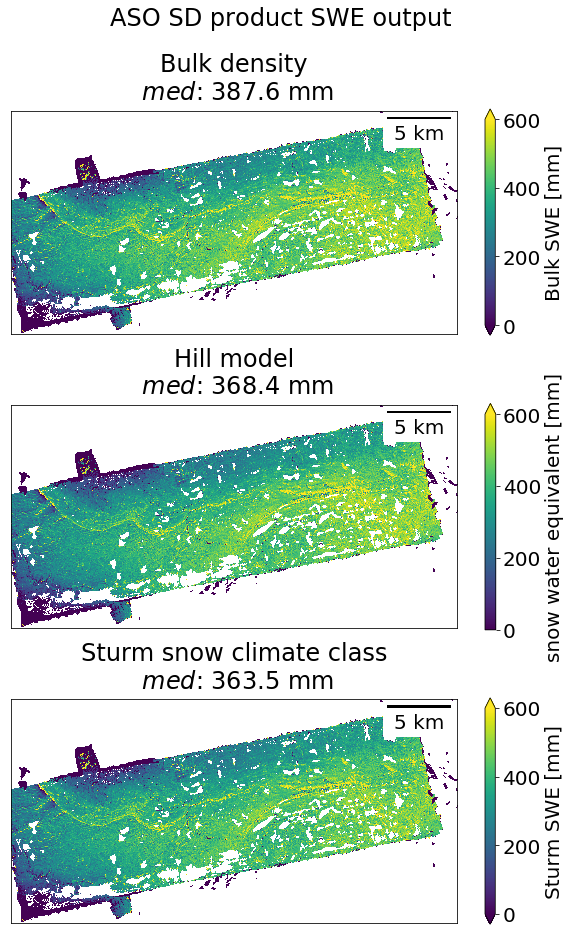

In [37]:
figsize=(10, len(sd_names)*5)

fig, axa = plt.subplots(len(sd_names), 1, figsize=figsize)

for c, (ax, swe, title) in enumerate(zip(axa, swe_list, sd_names)):
#     if c==0:
#         vmin=250
#         vmax=270
#     else:
    vmin=0
    vmax=600
    swe.plot.imshow(ax=ax, cmap='viridis', vmin=vmin, vmax=vmax, interpolation="None")
    ax.set_aspect('equal');
    ax.add_artist(ScaleBar(1))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    title=f'{title}\n $med$: {np.nanmedian(swe):.1f} mm'
    ax.set_title(title, y=1.025);

plt.suptitle('ASO SD product SWE output', y=0.975);
plt.subplots_adjust(hspace=0.3)

In [38]:
plt.rcParams.update({'font.size': 28})

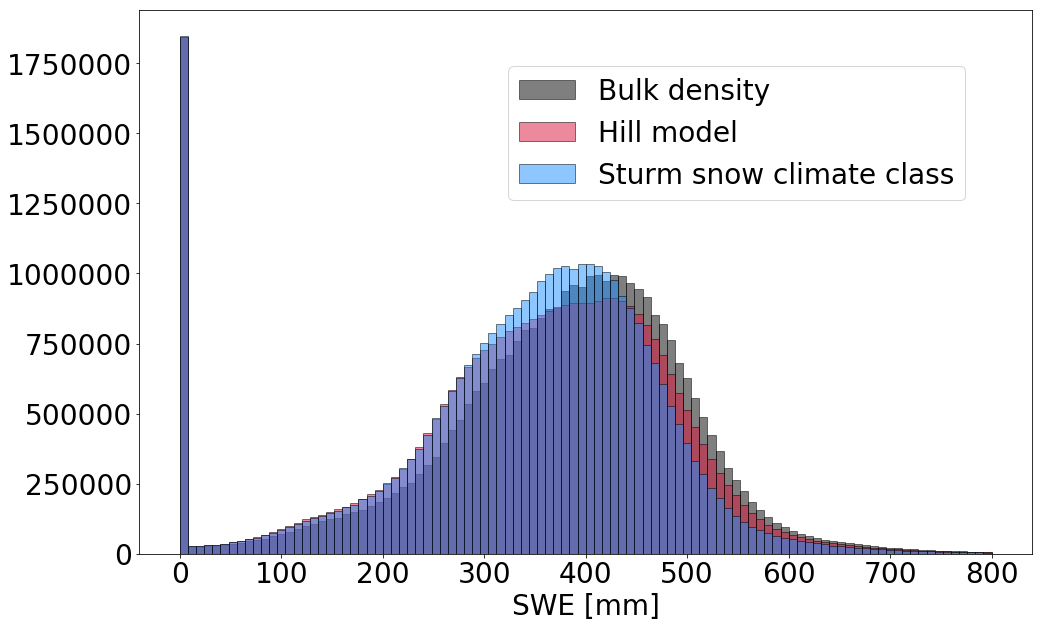

In [39]:
bins=100; alpha=0.5; ec='k'; figsize=(16, 10); ylim=(0, 2e6)
suptitle='ASO SD SWE estimate distributions'
# colors=['navy', 'dodgerblue', 'skyblue']
# colors=['k', 'r', 'b']
colors=['crimson', 'dodgerblue', 'g']
colors=['k', 'crimson', 'dodgerblue']

fig, ax = plt.subplots(figsize=figsize)
for c, (swe, title) in enumerate(zip(swe_list, sd_names)):
    swe.plot.hist(ax=ax, ec=ec, bins=bins, range=(0, 800), alpha=alpha, label=title, color=colors[c])
#     ax.set_ylim(ylim)
fig.legend(bbox_to_anchor=(0.85, 0.8))
# plt.title(suptitle);
plt.title('');
plt.xlabel('SWE [mm]');

In [ ]:
swe_list

In [ ]:
%%time
for swe, swe_fn in zip(swe_list, swe_fns):
    if not os.path.exists(swe_fn):
        print(swe_fn)
        swe.rio.to_raster(swe_fn)

In [15]:
# Load ASO SWE
swe_fns=fn_list('/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products', '*tif')
swe_fns

['/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGE_20180331.tif',
 '/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGE_20180524.tif',
 '/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGE_20190407.tif',
 '/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGE_20190610.tif',
 '/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGT_20180330.tif',
 '/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGT_20190408.tif',
 '/mnt/Backups/jmhu/data/stereo_test/ASO_SWE_products/ASO_50M_SWE_USCOGT_20190609.tif']

## Looks like there isn't any SWE product from 2017

In [15]:
del swe_list

---

# Warped 3DEP DEM plotting

In [16]:
def add_scalebar(ax, scale, location='upper left', frameon=True, color='k', box_color='w', box_alpha=1):
    ax.add_artist(ScaleBar(scale, location=location, frameon=frameon, color=color, box_color=box_color, box_alpha=box_alpha))

def prep_axis(ax, turnoffticks=None, turnoffaxis=None, turnofflabels=None, fc='k'):
    if turnoffticks:
        ax.set_xticks([])
        ax.set_yticks([])
    if turnoffaxis:
        ax.axis('off')
    if turnofflabels:
        ax.set_xlabel('')
        ax.set_ylabel('')
    if fc:
        ax.set_facecolor(fc)

In [17]:
warp_dsm_fn='/mnt/Backups/jmhu/data/stereo_test//3DEP_GM_test/frompfe/USGS_LPC_CO_MesaCo_QL2_2016_95th_perc_DSM_fromLAZ_reprojtest__warped2__USGS_one_meter_CO_MesaCo_QL2_allGM_2016-adj.tif'

warp_dsm=load(warp_dsm_fn, '3DEP snow-off DSM')

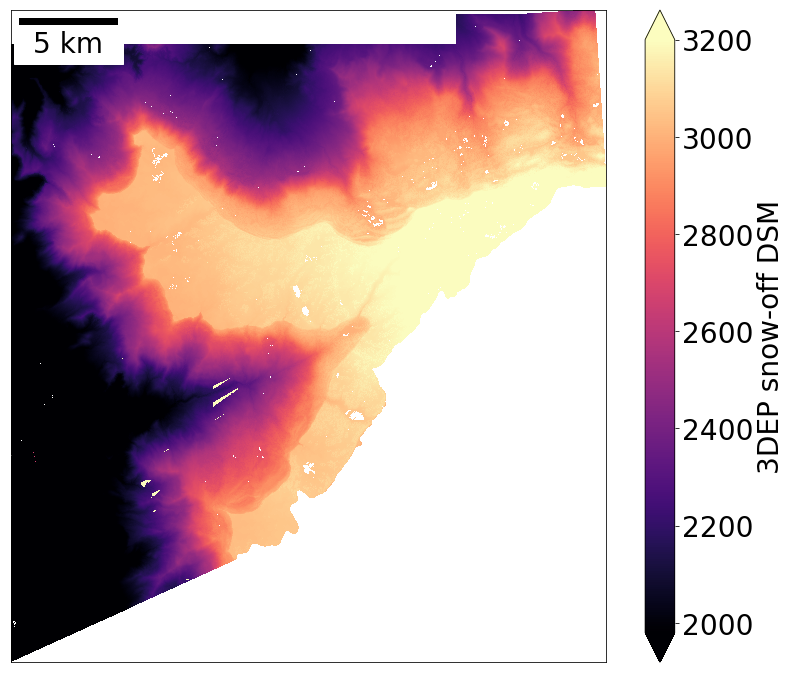

In [18]:
# vmin=2900
vmin=1980
vmax=3200
# vmin=None; vmax=None;


fig, ax = plt.subplots(figsize=(14,12))
warp_dsm.plot.imshow(ax=ax, cmap='magma', vmin=vmin, vmax=vmax)
add_scalebar(ax=ax, scale=1)
prep_axis(ax=ax, turnoffticks=True, turnofflabels=True, fc='w')
ax.set_aspect('equal')
plt.title('');

In [19]:
warp_dtm_fn='/mnt/Backups/jmhu/data/stereo_test//3DEP_GM_test/USGS_one_meter_CO_MesaCo_QL2_allGM_2016-adj.tif'
warp_dtm=load(warp_dtm_fn, '3DEP snow-off DTM')

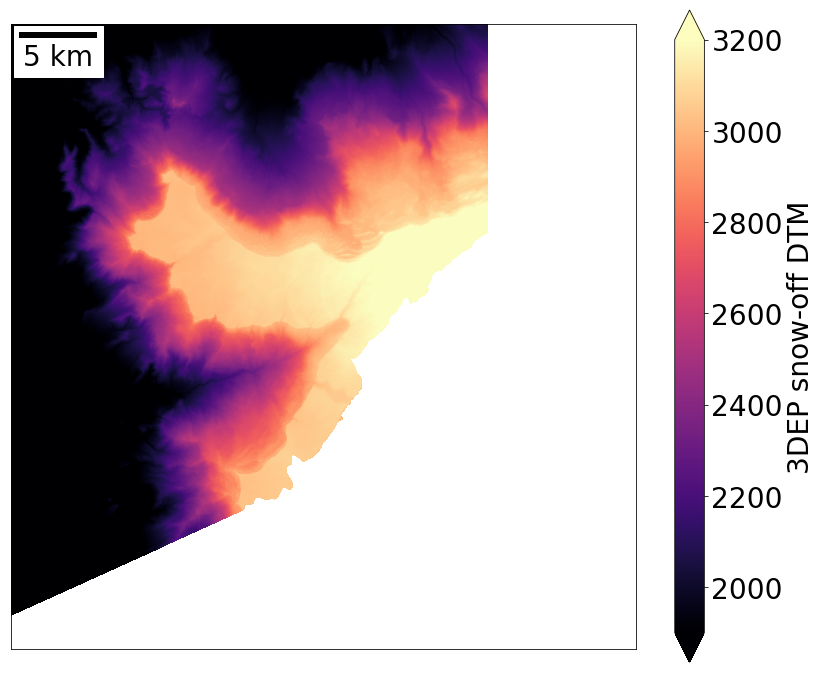

In [22]:
# vmin=2900
vmin=1900
vmax=3200
# vmin=None; vmax=None;


fig, ax = plt.subplots(figsize=(14,12))
warp_dtm.plot.imshow(ax=ax, cmap='magma', vmin=vmin, vmax=vmax)
add_scalebar(ax=ax, scale=1)
prep_axis(ax=ax, turnoffticks=True, turnofflabels=True, fc='w')
ax.set_aspect('equal')
plt.title('');

---

# Sturm + Bulk SWE calculations

In [2]:
sd_fns=['/mnt/Backups/jmhu/data/stereo_test/SD_WVDSMon_3DEPDSMoff_extentmatched2aso_snowextract.tif',
        '/mnt/Backups/jmhu/data/stereo_test/SD_WVDSMon_ASODSMoff_snowextract.tif',
        '/mnt/Backups/jmhu/data/stereo_test/ASO_SD_matched2WVDSMon_snowextract.tif']

In [5]:
sds=[load(sd_fn, "SD") for sd_fn in sd_fns]

## Convert all to mm for easy comparison

In [99]:
%%time
sturm_swes=[]
bulkdensity_swes=[]

sd_names=[f'WV/3DEP, ASO extent', f'WV/ASO', f'ASO']
for sd, sd_name in zip(sds, sd_names):    
    print(sd_name)
    sturm_swe = sturm_swecalc(h=sd, snow_class="Alpine", YMD="20170201")
    sturm_swe.name='SWE [mm]'
    sturm_swe=sturm_swe*1000
    bulk_swe = bulkdensity_swecalc(h=sd, bulk_density=0.35)
    bulk_swe.name='SWE [mm]'
    bulk_swe=bulk_swe*1000
    print("\n")
    sturm_swes.append(sturm_swe)
    bulkdensity_swes.append(bulk_swe)

WV/3DEP, ASO extent
SWE from basic calculations using bulk density of 0.35 kgm-3 is 0.50 meters


WV/ASO
SWE from basic calculations using bulk density of 0.35 kgm-3 is 0.16 meters


ASO
SWE from basic calculations using bulk density of 0.35 kgm-3 is 0.42 meters


CPU times: user 358 ms, sys: 7.63 ms, total: 366 ms
Wall time: 361 ms


In [110]:
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np

In [101]:
plt.rcParams.update({'font.size': 28})

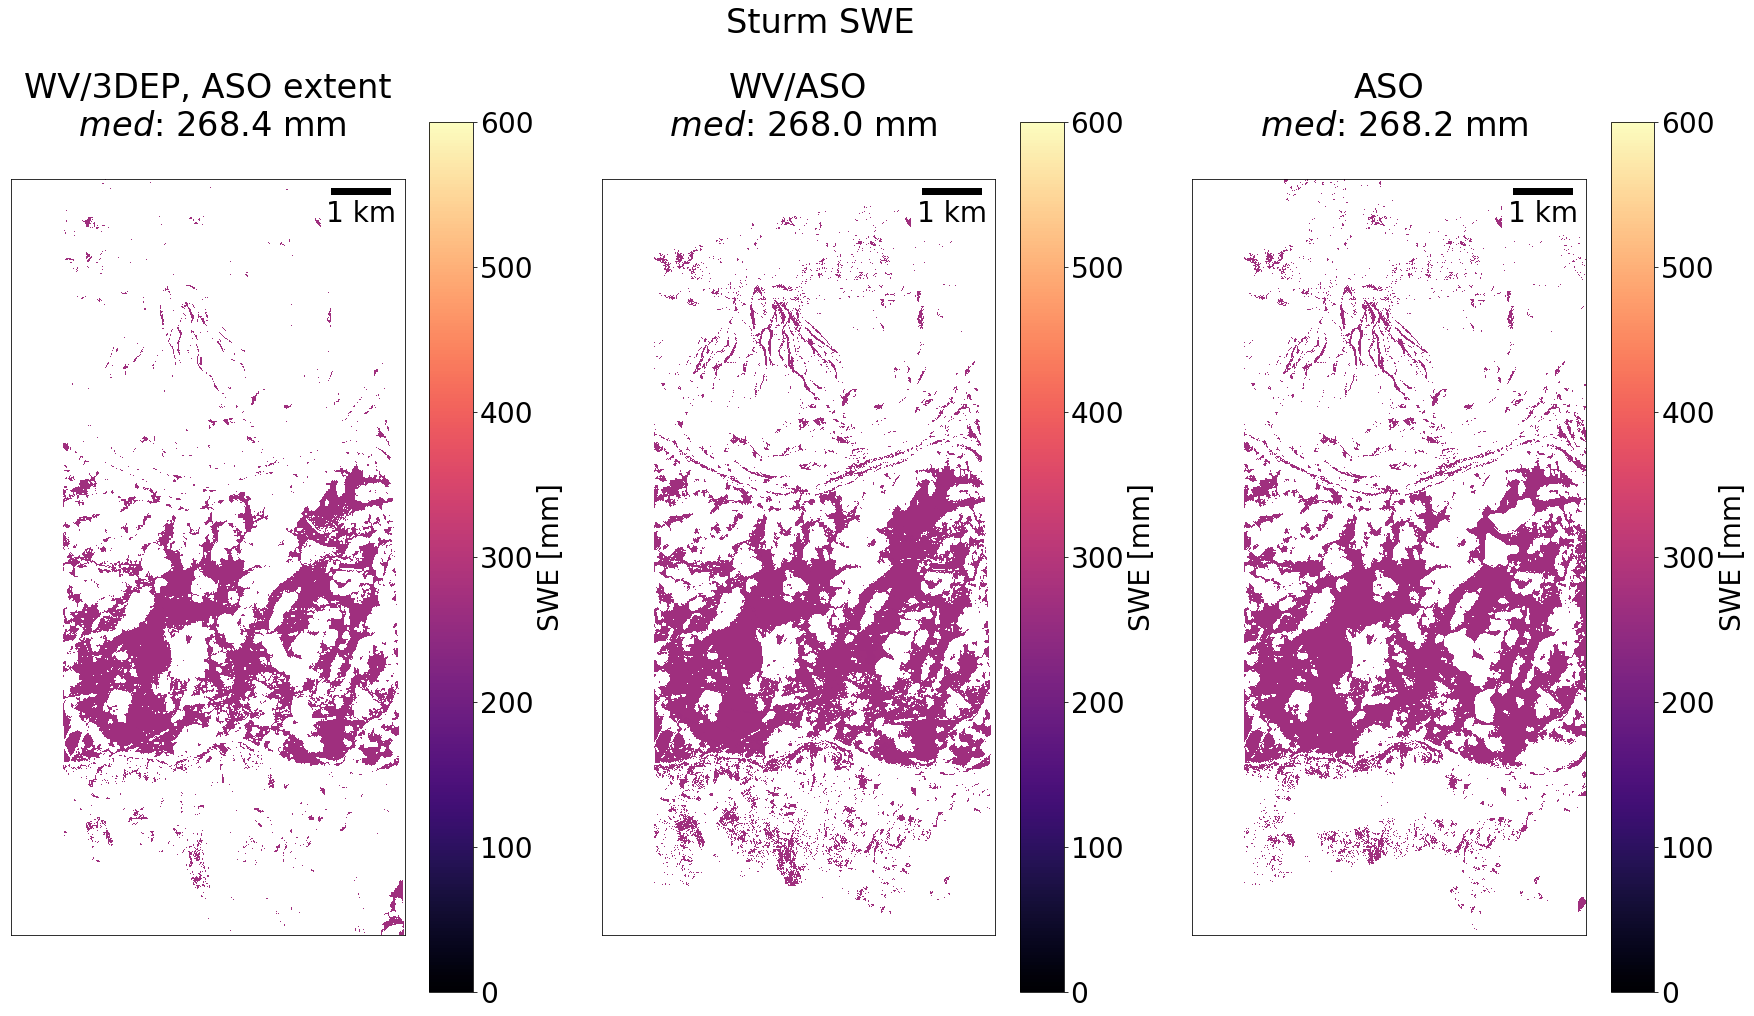

In [117]:
figsize=(len(sd_names)*10, 16)
fig, axa = plt.subplots(1, len(sd_names), figsize=figsize)
for c, (ax, swe, title) in enumerate(zip(axa, sturm_swes, sd_names)):
    swe.plot.imshow(ax=ax, cmap='magma', vmin=0, vmax=600, interpolation="None")
    ax.set_aspect('equal');
    ax.add_artist(ScaleBar(1))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    title=f'{title}\n $med$: {np.nanmedian(swe):.1f} mm'
    ax.set_title(title, y=1.05);

plt.suptitle('Sturm SWE');

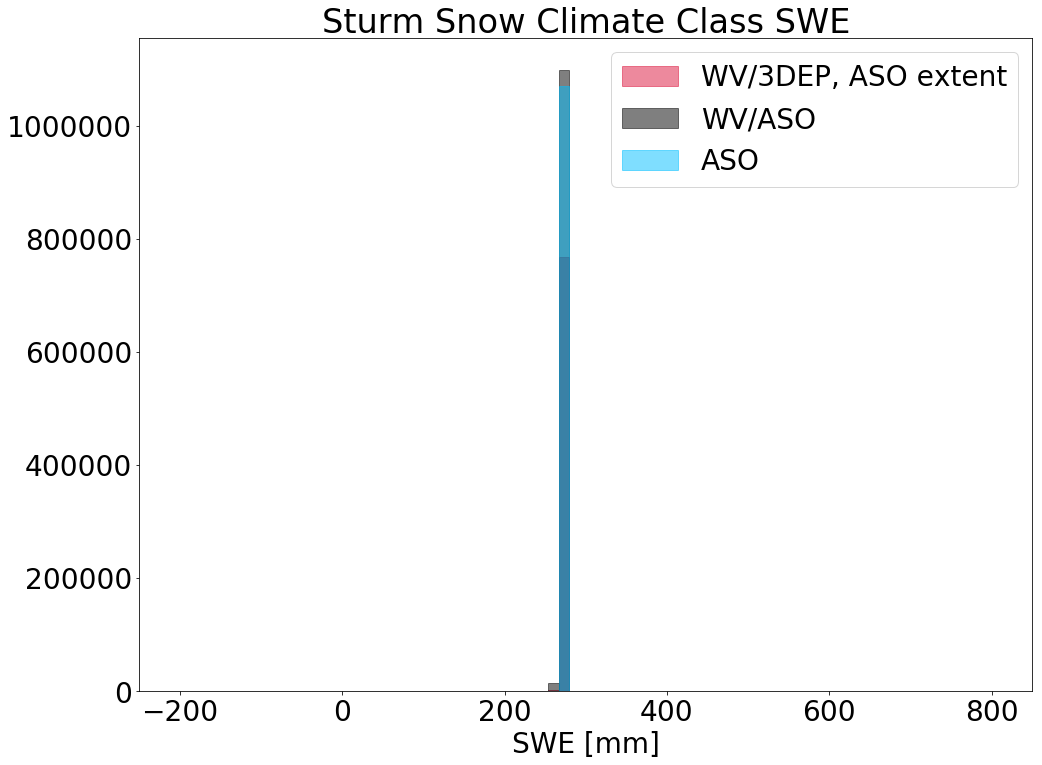

In [112]:
colors=['crimson','k','deepskyblue']

fig, ax = plt.subplots(1, figsize=(16, 12))
for c, (ax, swe, title) in enumerate(zip(axa, sturm_swes, sd_names)):
    swe_ma=swe.copy()
    swe_ma.values[swe.values==0]=np.nan
    swe.plot.hist(bins=75, 
                    ec=colors[c],
                    alpha=0.5, range=(-200, 800), 
#                   range=(265, 270), 
                    label=f'{title}', 
                    color=colors[c],
                   )
plt.xlabel('SWE [mm]')
plt.title('Sturm Snow Climate Class SWE')
plt.legend();

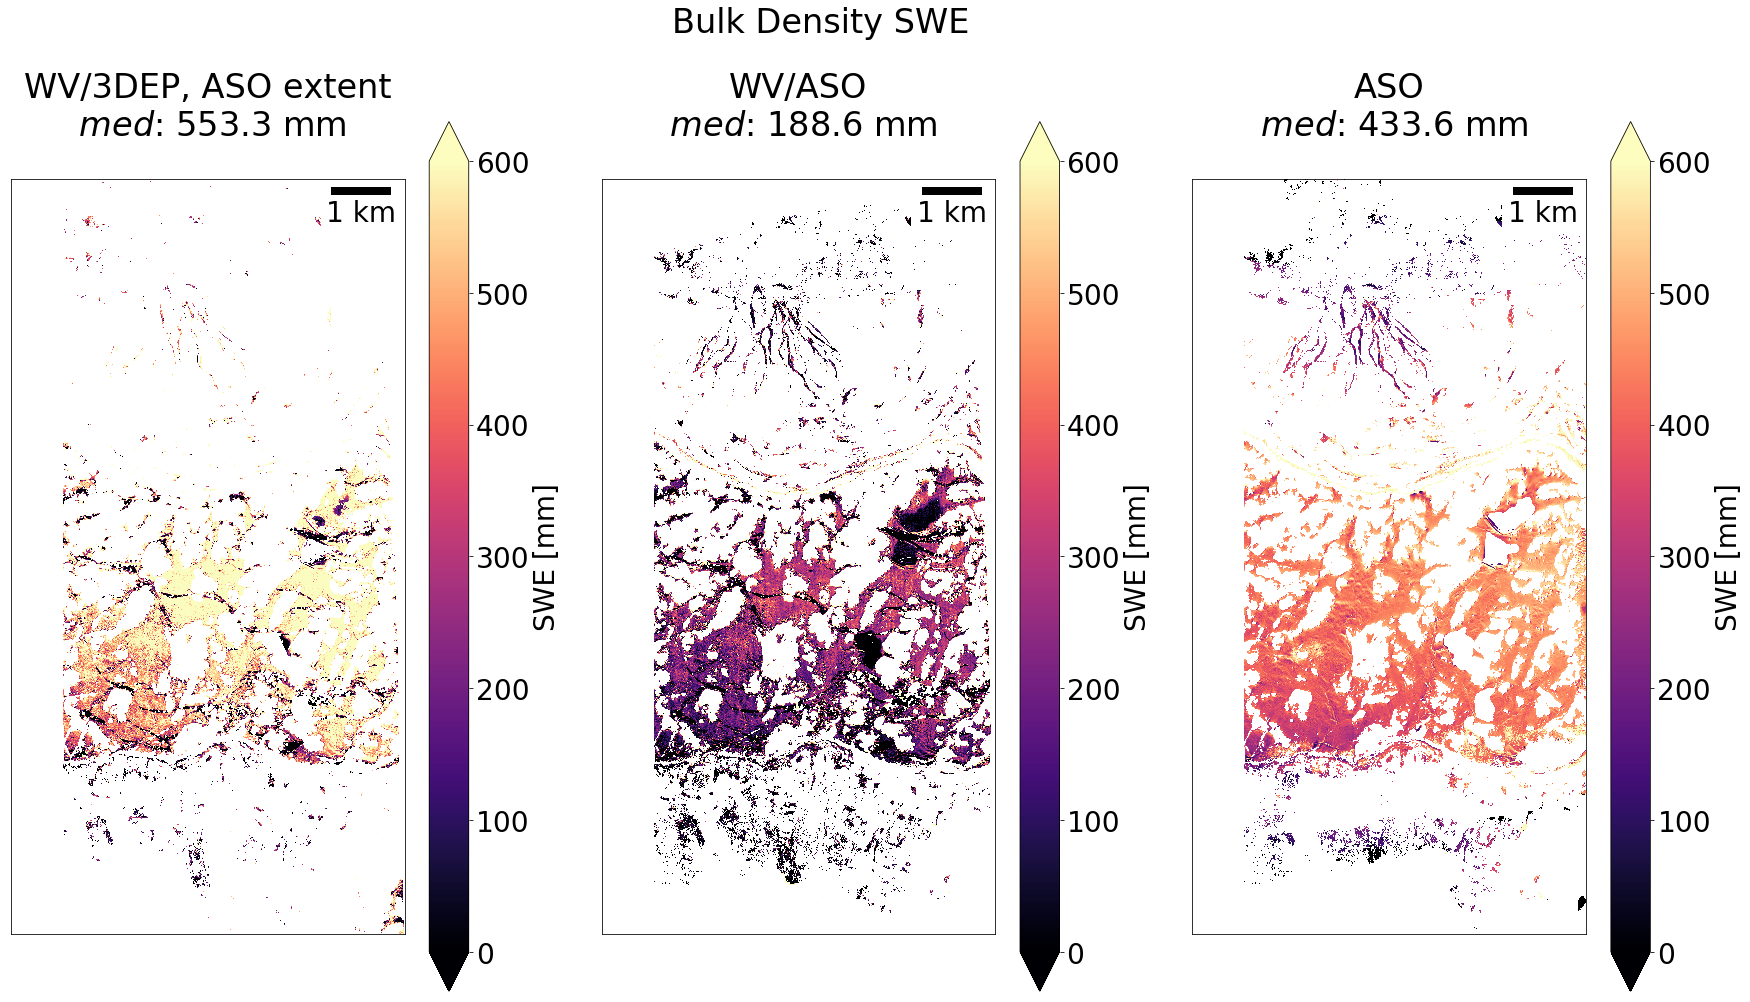

In [121]:
figsize=(len(sd_names)*10, 16)
fig, axa = plt.subplots(1, len(sd_names), figsize=figsize)
for c, (ax, swe, title) in enumerate(zip(axa, bulkdensity_swes, sd_names)):
    swe.plot.imshow(ax=ax, cmap='magma', vmin=0, vmax=600, interpolation="None")
    ax.set_aspect('equal');
    ax.add_artist(ScaleBar(1))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    title=f'{title}\n $med$: {np.nanmedian(swe):.1f} mm'
    ax.set_title(title, y=1.05);
    

plt.suptitle('Bulk Density SWE');

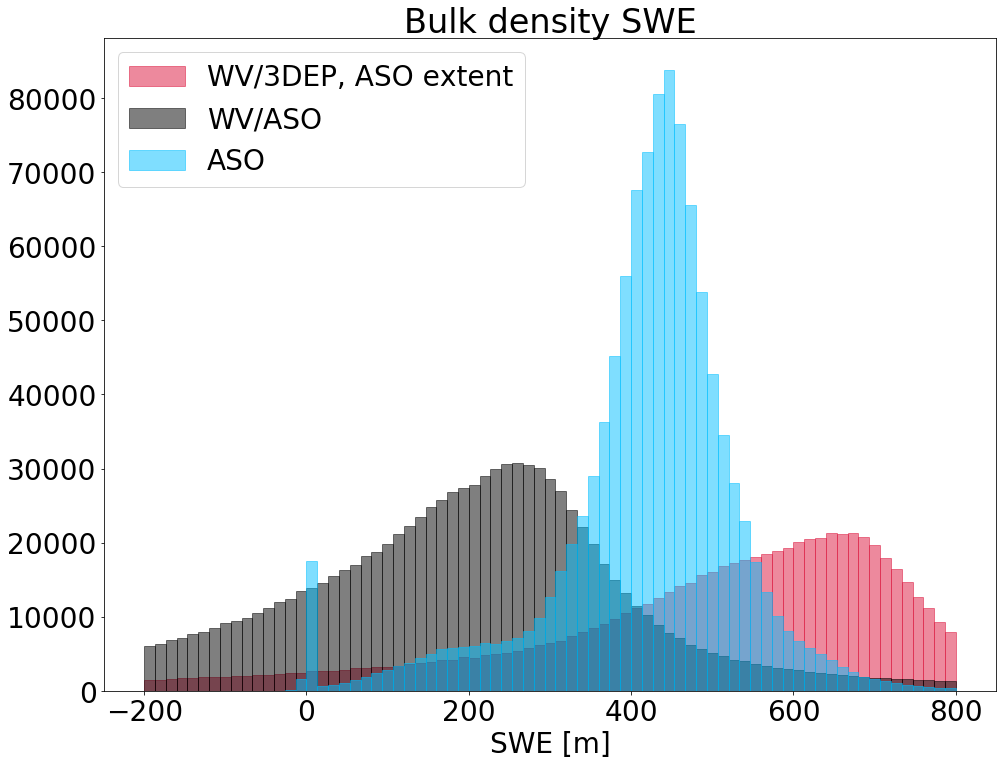

In [120]:
colors=['crimson','k','deepskyblue']

fig, ax = plt.subplots(1, figsize=(16, 12))
for c, (ax, swe, title) in enumerate(zip(axa, bulkdensity_swes, sd_names)):
    swe_ma=swe.copy()
    swe_ma.values[swe.values==0]=np.nan
    swe.plot.hist(bins=75, 
                    ec=colors[c],
                    alpha=0.5, range=(-200, 800), 
#                   range=(265, 270), 
                    label=f'{title}', 
                    color=colors[c],
                   )

plt.xlabel('SWE [m]')
plt.title('Bulk density SWE')
plt.legend();

---

# Archived point calcs

In [1]:
import numpy as np

# Bulk density model based on climate classes of seasonal snow
DOY_i = -92          # specify the day of year of interest (-92 = Oct 1; +181 = June 30)
h_i = 1.4           # ith observation of snow_depth in meters

snow_classes = ["Alpine", "Maritime", "Prairie", "Tundra", "Taiga"]
rho_maxes = [0.5975, 0.5979, 0.5940, 0.3630, 0.2170]
rho_inits = [0.2237, 0.2578, 0.2332, 0.2425, 0.2170]
k1s = [0.0012, 0.0010, 0.0016, 0.0029, 0.0000]
k2s = [0.0038, 0.0038, 0.0031, 0.0049, 0.0000]

In [12]:
# Determine model parameters based on climate snow class
# Ephemeral snow lacked sufficient systematic measurements, was excluded
# rho_max is the maximum bulk density of the season
# rho_init is the initial seasonal bulk density
# k1 is the densification parameter for snow_depth
# k2 is the densification parameter for DOY
climate_class = 1   # values range 1-5 based on snow class

snow_class = snow_classes[climate_class-1]
rho_max = rho_maxes[climate_class-1]
rho_init = rho_inits[climate_class-1]
k1 = k1s[climate_class-1]
k2 = k2s[climate_class-1]

print(snow_class)
print(rho_max)
print(rho_init)
print(k1)
print(k2)

Alpine
0.5975
0.2237
0.0012
0.0038


In [8]:
# t = snow deposition history
# rho_b = function of h_s, t, and initial snow layer density
rho_b_model = (rho_max - rho_init) * (1-np.exp(-k1 * h_i - k2 * DOY_i)) + rho_init

print(rho_b_model)

0.17463345860409046


In [9]:
# Basic SWE calculation using snow_depth and bulk_density
h_s = 1             # snow_depth in meters
rho_w = 1           # density_of_water in grams/cubic cm
# rho_b = 0.3         # bulk_density in grams/cubic cm

swe = h_s * rho_b_model / rho_w
print("SWE from basic calculations using bulk density is "
+ str(format(swe, '.2f')) + " meters in the " + snow_class + " snow class.")


SWE from basic calculations using bulk density is 0.17 meters in the Tundra snow class.
